In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# Sampling Distribution of a Statistic

In [5]:
loans_income = pd.read_csv('loans_income.csv').squeeze('columns')
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

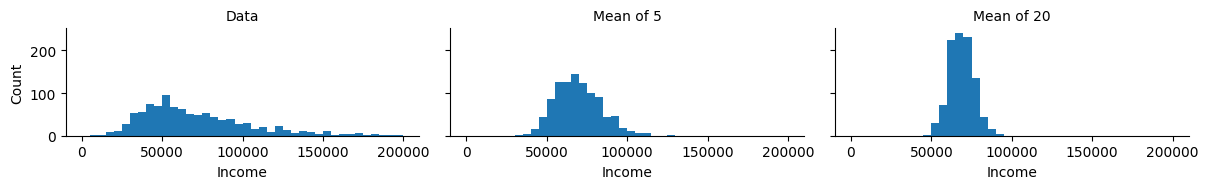

In [13]:
sample_data = pd.DataFrame({
    "income":loans_income.sample(1000),
    "type":"Data"
})
    
sample_mean_05 = pd.DataFrame({
    "income":[loans_income.sample(5).mean() for _ in range(1000)],
    "type": "Mean of 5"
})

sample_mean_20 = pd.DataFrame({
    "income": [loans_income.sample(20).mean() for _ in range(1000)],
    "type":"Mean of 20"
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(data=results, col='type', col_wrap=3, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels("Income","Count")
g.set_titles('{col_name}') # this is associated with the col='type'
plt.show()

# The Bootstrap

In [16]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print(f"Bootstrap Statistics")
print(f"Original: {loans_income.median()}")
print(f"Bias: {results.mean() - loans_income.median()}")
print(f"Std Error: {results.std()}")

Bootstrap Statistics
Original: 62000.0
Bias: -69.84649999999965
Std Error: 210.2048578649416


# Confidence Intervals

68760.51844
55734.1


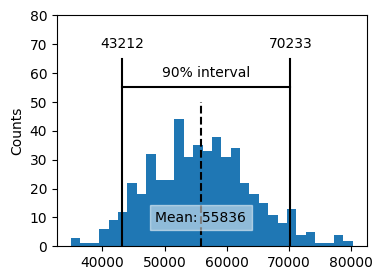

In [25]:
print(loans_income.mean())
np.random.seed(seed=3)

# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())

results = []

for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))

# create the histogram of the sample
ax = results.plot.hist(bins=30, figsize=(4,3))

#plots the horizontal confidence interval line at 43212 and 70233 at a height of 55
ax.plot(confidence_interval, [55,55], color='black')

#plots the vertical confidence interval lines at 43212 and 70233 
for x in confidence_interval:
    ax.plot([x,x], [0,65], color='black')
    ax.text(x, 70, f"{x:.0f}",
           horizontalalignment='center', verticalalignment='center')

# prints the text '90% interval at height 60 in the middle of the confidence interval'
ax.text(sum(confidence_interval)/2, 60, '90% interval',
       horizontalalignment="center", verticalalignment="center")

meanIncome = results.mean()

# plot the mean income line with a height of 50
ax.plot([meanIncome, meanIncome], [0,50], color="black", linestyle="--")

# create the mean income text "Mean: 55836" in the middle at height 10
ax.text(meanIncome, 10, f"Mean: {meanIncome:.0f}",
        bbox=dict(facecolor="white", edgecolor="white", alpha=0.5),
        horizontalalignment="center", verticalalignment="center")

ax.set_ylim(0,80)
ax.set_ylabel("Counts")
plt.tight_layout
plt.show()
    

# Normal Distribution
## Standard Normal and QQ-Plots

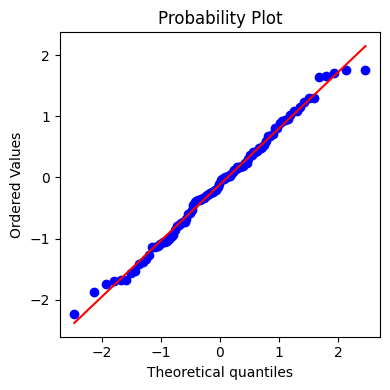

In [29]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

# Long-Tailed Distributions

In [30]:
sp500_px = pd.read_csv('sp500_data.csv.gz')
sp500_px.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


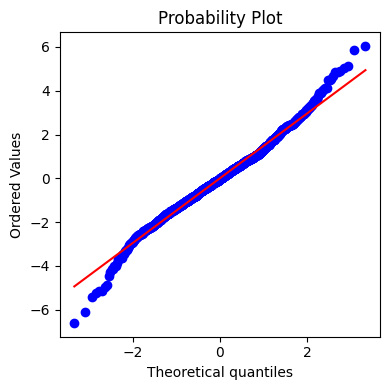

In [34]:
nflx = sp500_px["NFLX"]
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)
plt.tight_layout()
plt.show()

# Binomial Distribution

In [35]:
# the probability ofsample observing exactly 2 successes in five trials where
# the probability of success for each trail is 0.1

# probability at a specific point
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [36]:
# the probability of observing 2 or fewer successes in five trials where 
#the probability of success for each trail is 0.1

# cumulative probability
stats.binom.cdf(2, n=5, p=0.1)

0.99144

# Poisson and Related Distribution
## Poisson Distributions

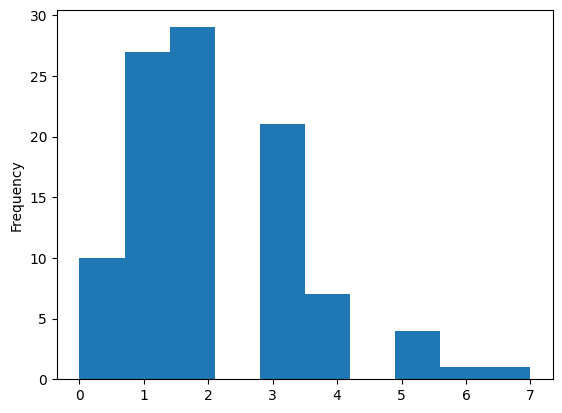

In [37]:
sample = stats.poisson.rvs(2, size=100)
pd.Series(sample).plot.hist()
plt.show()

## Exponential Distribution

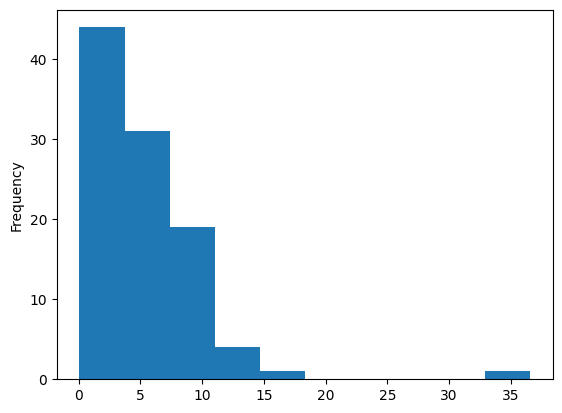

In [38]:
sample = stats.expon.rvs(scale=5, size=100)
pd.Series(sample).plot.hist()
plt.show()

##  Weibull Distribution

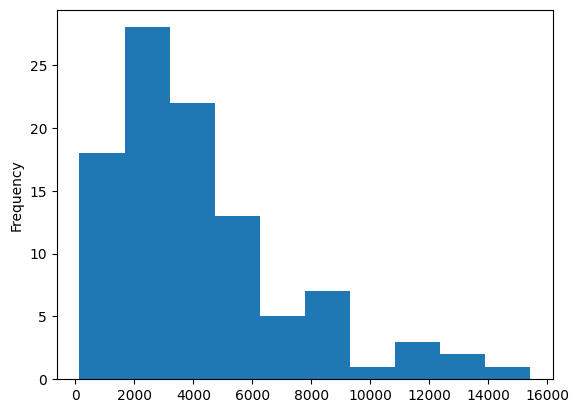

In [41]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)
pd.Series(sample).plot.hist()
plt.show()